In [94]:
#Llamar al dataloader
%run DataLoader.ipynb

# Análisis de palabras y texto

In [95]:
#Hacemos un fillna porque a la hora de hacer group by, buscar duplicados o hacer un pivot
#los NaN generan un mal resultado

dataset = dataset.fillna(value='NaN')

#Agregamos la columna del texto procesado junto con la cantidad de parrafos y de palabras de ese texto
dataset['texto_normalizado'] = dataset.text.apply(lambda x : normalizar_texto(x))
dataset['cant_palabras'] = dataset.texto_normalizado.str.count(' ') + 1
dataset['cant_parrafos'] = dataset.text.str.count('\n') + 1
# dataset.keyword = dataset.keyword.apply(lambda x : normalizar_texto(x))
# dataset.location = dataset.location.apply(lambda x : normalizar_texto(x))

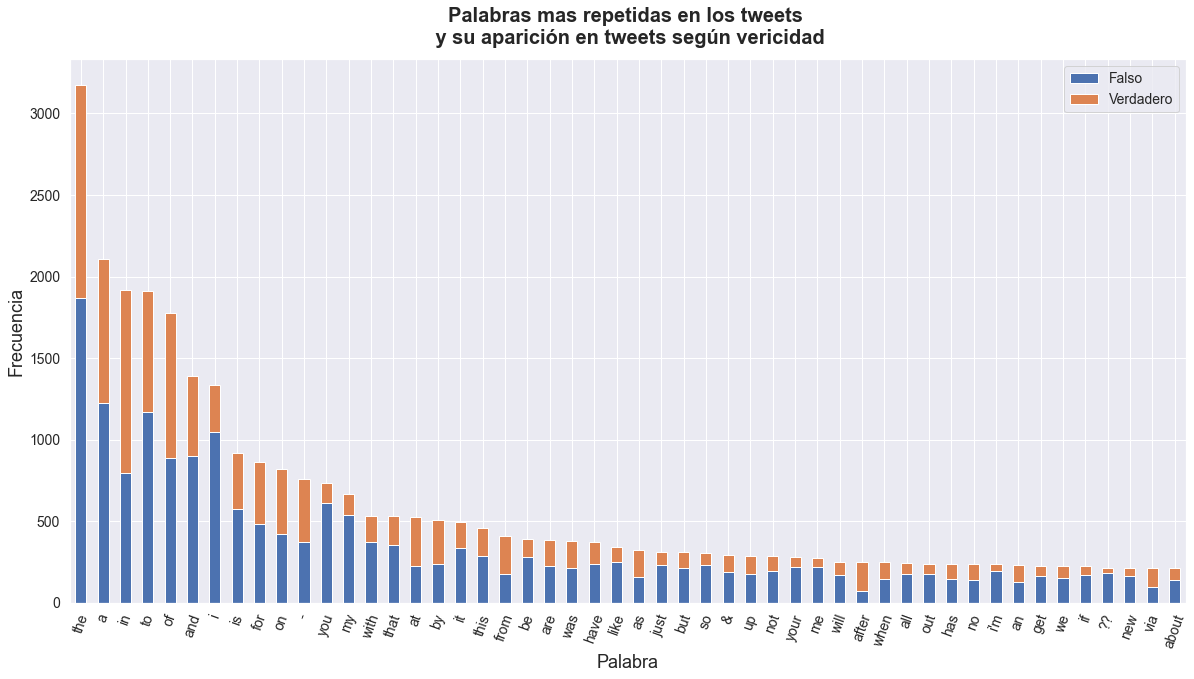

In [96]:
#Palabras mas comunes y su relación con la veracidad

grupoPalabrasVeracidad = dataset.groupby(['texto_normalizado', 'target']).agg({'text':'count'})
grupoPalabrasVeracidad = grupoPalabrasVeracidad.reset_index()[['texto_normalizado', 'target']]


#Ponemos cada palabra como una fila y le asignamos un 1 para poder hacer la suma
grupoPalabrasVeracidad = grupoPalabrasVeracidad.assign(\
    texto_normalizado=grupoPalabrasVeracidad.texto_normalizado.str.lower().str.split()).\
    explode('texto_normalizado')

grupoPalabrasVeracidad['repeticiones'] = 1


# Hacemos un pivot de la tabla para ver los resultados de mejor manera
grupoPalabrasVeracidad = grupoPalabrasVeracidad.pivot_table(index = 'texto_normalizado',\
        columns = 'target', values = 'repeticiones', fill_value = 0, aggfunc = 'sum')
grupoPalabrasVeracidad.columns = ['Falso', 'Verdadero']
grupoPalabrasVeracidad['Total'] = grupoPalabrasVeracidad.Falso + grupoPalabrasVeracidad.Verdadero
grupoPalabrasVeracidad = grupoPalabrasVeracidad.sort_values(by = 'Total', ascending=False)
grupoPalabrasVeracidad = grupoPalabrasVeracidad.drop(columns = ['Total'])

fig, ax = plt.subplots()

grupoPalabrasVeracidad[:50].plot.bar(ax = ax, stacked = True)

plt.ylabel('Frecuencia')
plt.xlabel("Palabra")
plt.xticks(rotation=70)
plt.title('Palabras mas repetidas en los tweets \n y su aparición en tweets según vericidad', pad = 15)
plt.show()

## Cantidad de palabras

In [98]:
#Tweets y cantidad de parrafos con dist verdadero/falso
grupoCantPalabras = dataset.groupby(['cant_palabras', 'target']).agg({'text':'count'})
grupoCantPalabras.columns = ['repeticiones']
grupoCantPalabras = grupoCantPalabras.reset_index()

# Hacemos un pivot de la tabla para ver los resultados repetidos de mejor manera
grupoCantPalabras = grupoCantPalabras.pivot_table(index = 'cant_palabras',\
     columns = 'target', values = 'repeticiones', fill_value = 0)
grupoCantPalabras.columns = ['Falso', 'Verdadero']

grupoCantPalabras

,Falso,Verdadero
cant_palabras,,
1,8,0
2,30,4
3,62,13
4,91,24
5,120,39
6,134,52
7,159,83
8,160,133
9,220,143


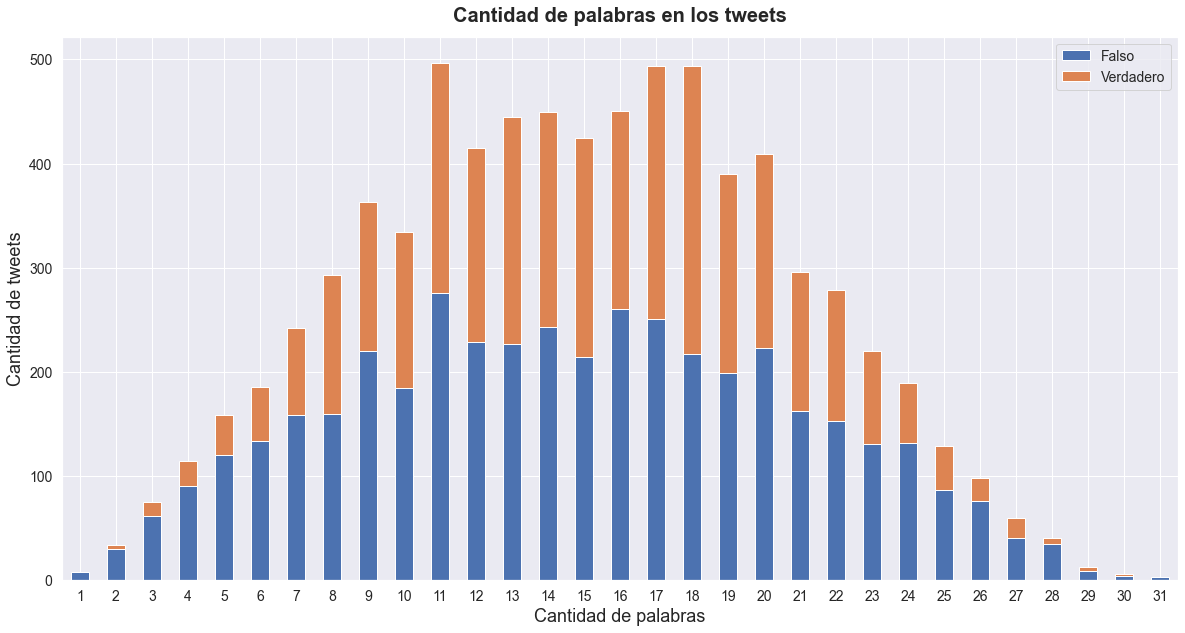

In [99]:
fig, ax = plt.subplots()
grupoCantPalabras.plot.bar(ax = ax, stacked = True)
plt.ylabel('Cantidad de tweets')
plt.xlabel("Cantidad de palabras")
plt.title('Cantidad de palabras en los tweets', pad = 15)
plt.xticks(rotation=0)
plt.show()
# fig.savefig('figure.png')

In [100]:
#Cantidad total de palabras
len(' '.join(dataset.texto_normalizado).lower().split())

113382

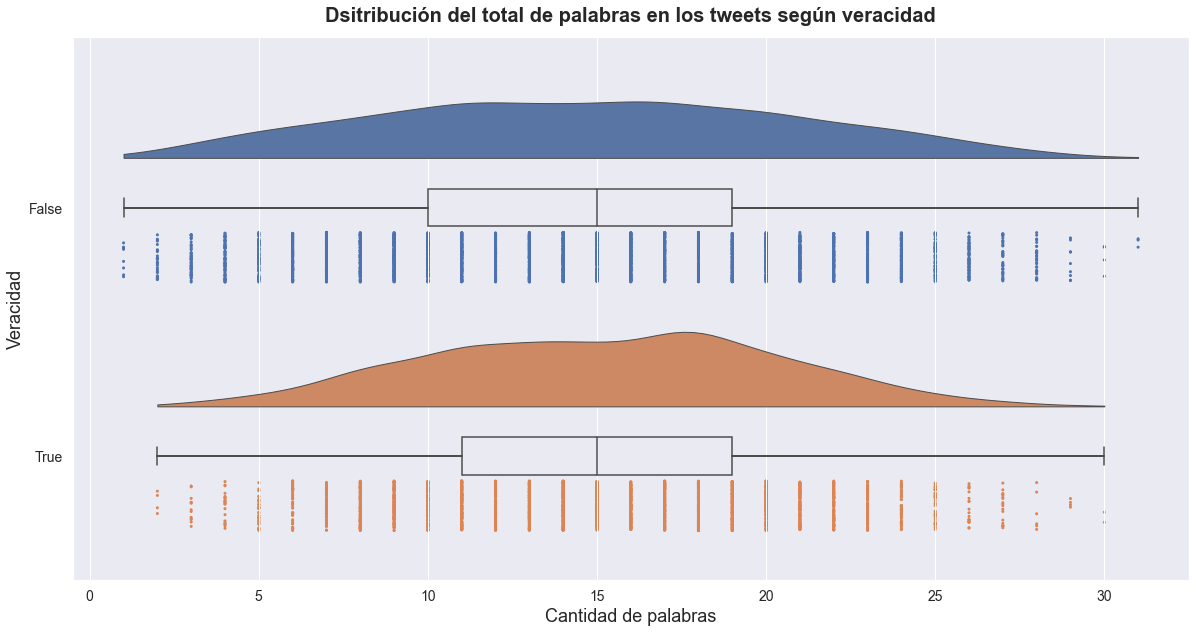

In [101]:
fig, ax = plt.subplots()
pt.RainCloud(data = dataset[['cant_palabras', 'target']], x = 'target', y = 'cant_palabras',\
             palette = sns.color_palette(n_colors=2), move = .2, bw = .2 ,width_viol = .6, ax = ax, orient = 'h')
plt.ylabel('Veracidad')
plt.xlabel("Cantidad de palabras")
plt.title('Dsitribución del total de palabras en los tweets según veracidad', pad = 15)
plt.xticks(rotation=0)
plt.show()

## Cantidad de parrafos

In [102]:
#Tweets y cantidad de parrafos con dist verdadero/falso
grupoCantParrafos = dataset.groupby(['cant_parrafos', 'target']).agg({'text':'count'})
grupoCantParrafos.columns = ['repeticiones']
grupoCantParrafos = grupoCantParrafos.reset_index()

# Hacemos un pivot de la tabla para ver los resultados repetidos de mejor manera
grupoCantParrafos = grupoCantParrafos.pivot_table(index = 'cant_parrafos',\
     columns = 'target', values = 'repeticiones', fill_value = 0)
grupoCantParrafos.columns = ['Falso', 'Verdadero']

grupoCantParrafos

,Falso,Verdadero
cant_parrafos,,
1,4096,3082
2,113,93
3,75,50
4,24,19
5,12,17
6,5,0
7,5,5
8,3,0
9,3,0


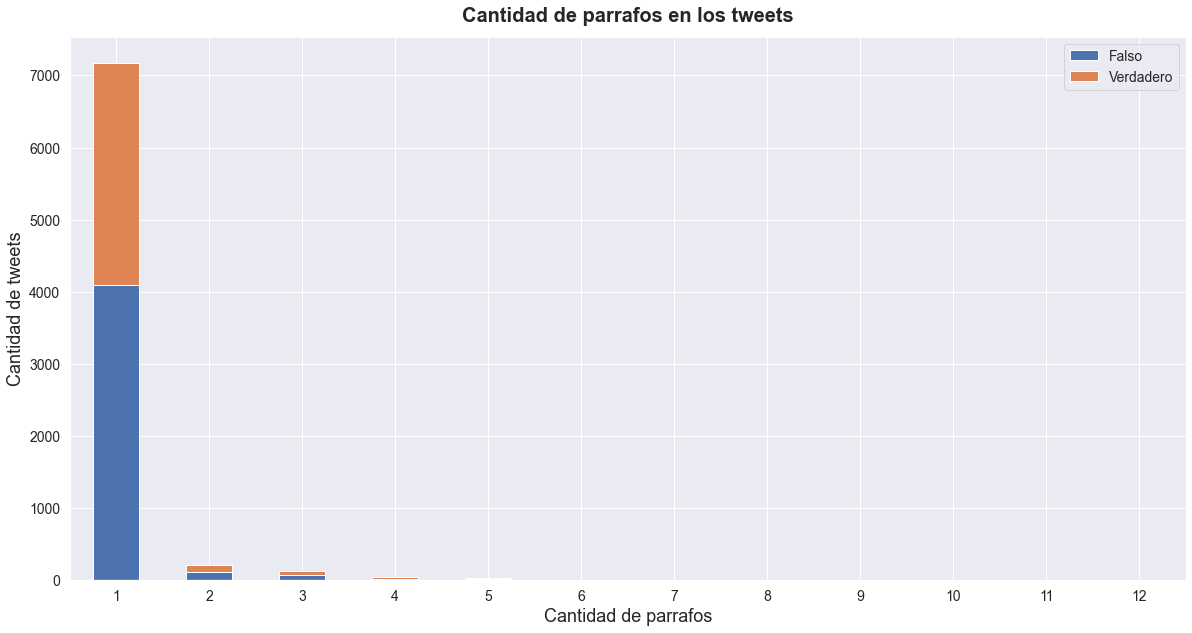

In [103]:
fig, ax = plt.subplots()
grupoCantParrafos.plot.bar(ax = ax, stacked = True)
plt.ylabel('Cantidad de tweets')
plt.xlabel("Cantidad de parrafos")
plt.title('Cantidad de parrafos en los tweets', pad = 15)
plt.xticks(rotation=0)
plt.show()
# fig.savefig('figure.png')

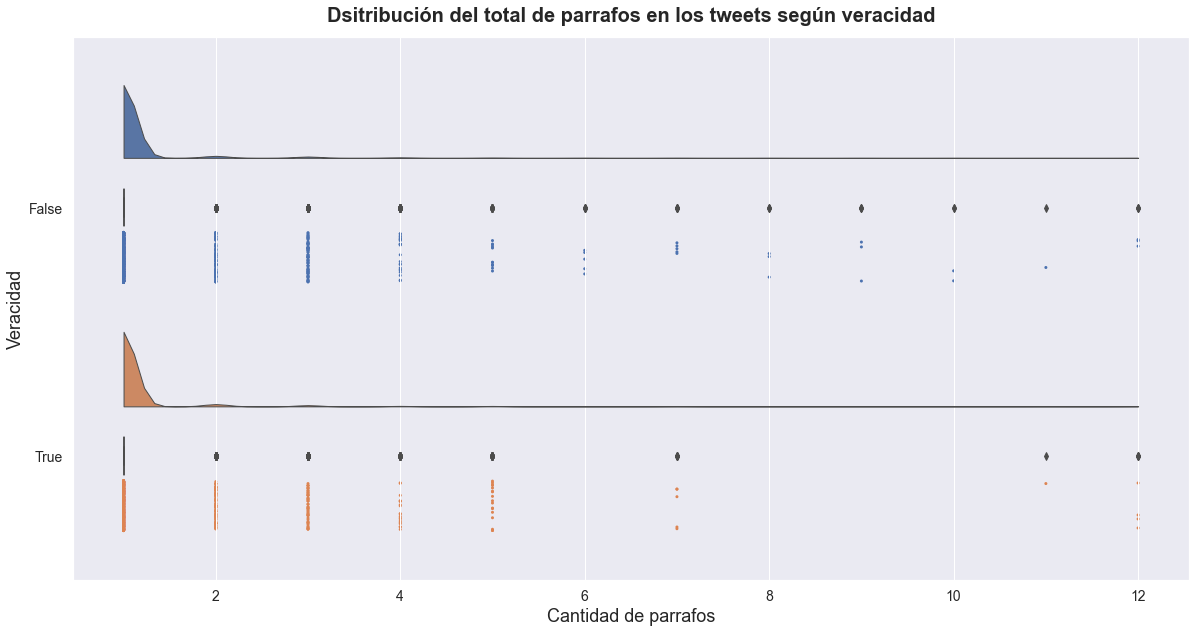

In [104]:
fig, ax = plt.subplots()
pt.RainCloud(data = dataset[['cant_parrafos', 'target']], x = 'target', y = 'cant_parrafos',\
             palette = sns.color_palette(n_colors=2), move = .2, bw = .2 ,width_viol = .6, ax = ax, orient = 'h')
plt.ylabel('Veracidad')
plt.xlabel("Cantidad de parrafos")
plt.title('Dsitribución del total de parrafos en los tweets según veracidad', pad = 15)
plt.xticks(rotation=0)
plt.show()